# Mushroom Classifcation: Data mining

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sklearn
import os

## Data Understanding

The following attribution legend was supplied by the UCI machine learning repository:

Attribute Information: (classes: edible=e, poisonous=p)
1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
1. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
1. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
1. bruises?:                 bruises=t,no=f
1. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
1. gill-attachment:          attached=a,descending=d,free=f,notched=n
1. gill-spacing:             close=c,crowded=w,distant=d
1. gill-size:                broad=b,narrow=n
1. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
1. stalk-shape:              enlarging=e,tapering=t
1. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
1. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
1. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
1. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
1. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
1. veil-type:                partial=p,universal=u
1. veil-color:               brown=n,orange=o,white=w,yellow=y
1. ring-number:              none=n,one=o,two=t
1. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
1. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
1. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
1. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d
* Any distributions?
* Extreme Values?

## Data loading and Preprocessing

Let's load in the data and take a high level look at what we are working with.

In [2]:
#check current directory, change if necessary
os.getcwd()
#chdir("C:/Users/andreacruz/Documents/University of Colorado, Boulder MSDS/Data Mining Foundations and Practice/Data Mining Project/Mushrooms")

#Import data from csv file
mush_df = pd.read_csv('mushrooms.csv')
#display first 20 rows to confirm
mush_df.head(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
#determine how much data we are dealing with
mush_df.shape

(8124, 23)

All columns seem to be uniquely identified as categorical variables, supporting that classification of this data would be logical.

In [4]:
#check data for N/A values
mush_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Luckily, there are no null values detected. No instances will have to be dropped, supplemented with information, etc.

In [5]:
#look at stats of dataframe
mush_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Looks like we have 8124 instances of mushroom entries with 23 columns. In this case the columns reflect the mushroom attributes.
* *unique* reflects the unique values for each column category
* *top* reflects the most frequent unique value for each column category
* *freq* reflects specific frequency value for *top* unique value

In [6]:
#determine distribution of class variable
mush_df['class'] = np.where(mush_df['class'] == "e", "Edible", "Poisonous")
class_df = pd.DataFrame(mush_df['class'].value_counts())



array([<AxesSubplot:ylabel='class'>], dtype=object)

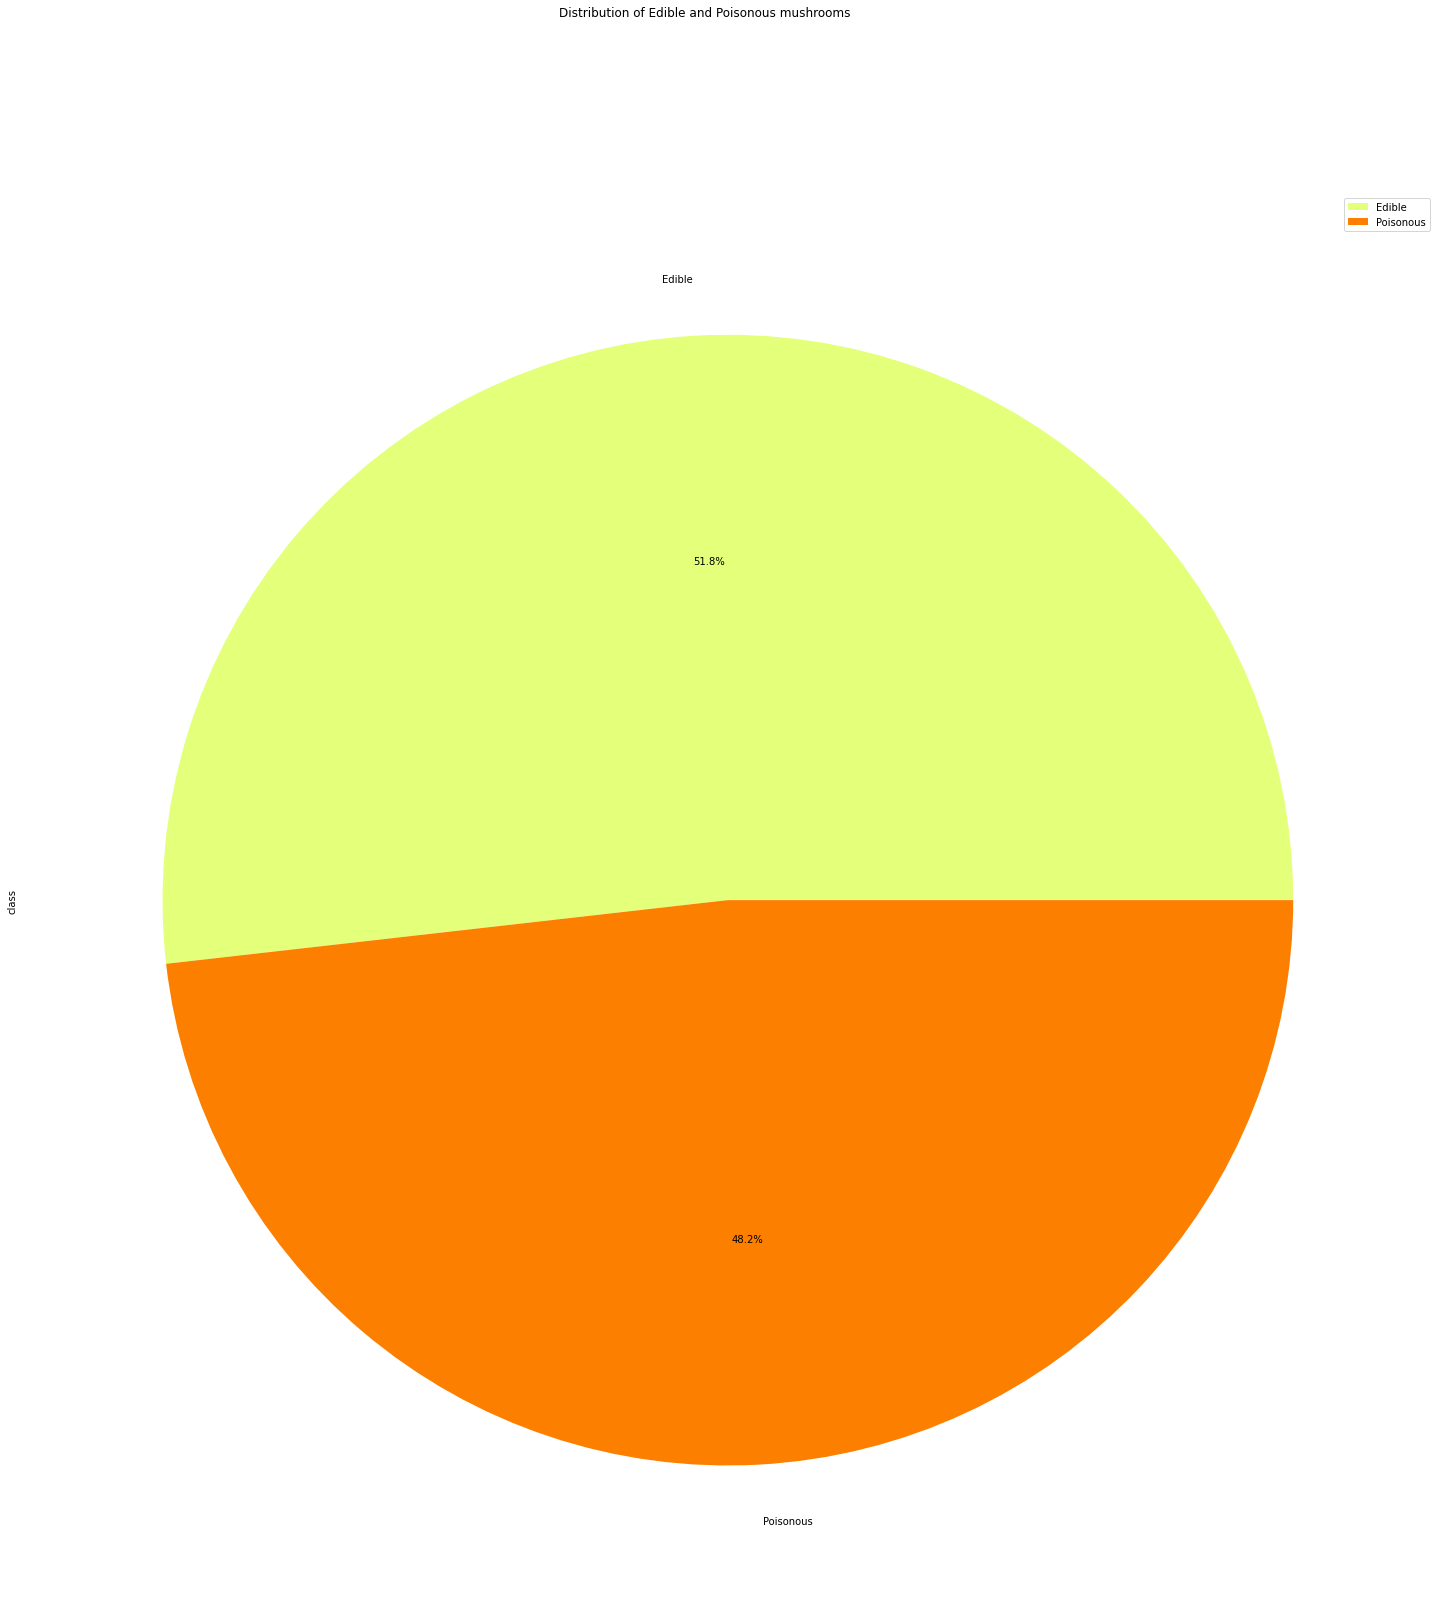

In [7]:
class_df
class_df.plot(kind = 'pie',figsize = (26,26),title = "Distribution of Edible and Poisonous mushrooms", autopct='%.1f%%', subplots = 'True', colormap = "Wistia")



Based on this breakdown, 51.8% of the data is classified as "edible" while 48.2% is classified as "poisonous." For the purpose of this project this attribute is considered our "target attribute" and what we will attempt to predict. This also indicates a pretty even distribution between the two classes. 

It may be useful to explore additionally any variables that have 2 unique values and observe if any similar distributions exists as related to edible vs poisonous.

/Applications/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


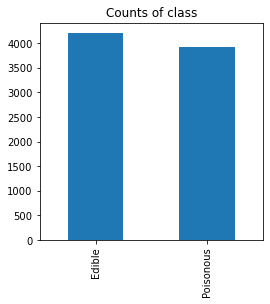

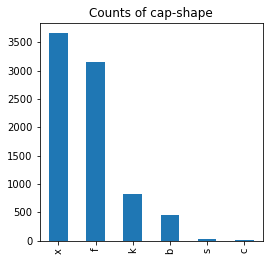

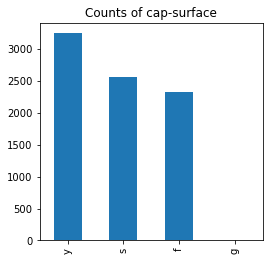

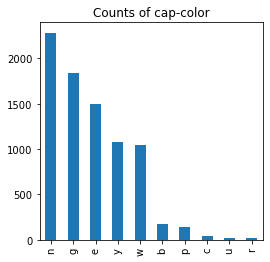

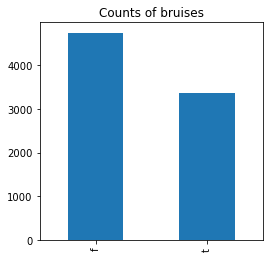

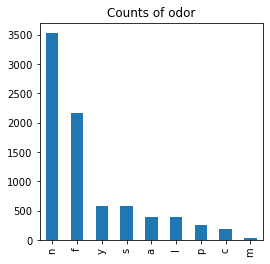

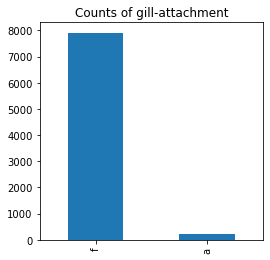

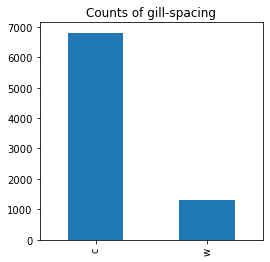

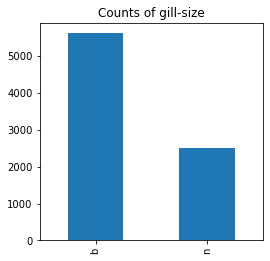

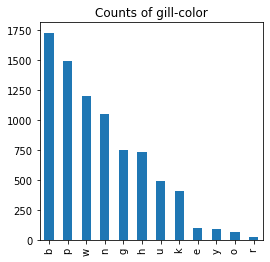

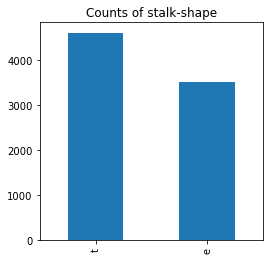

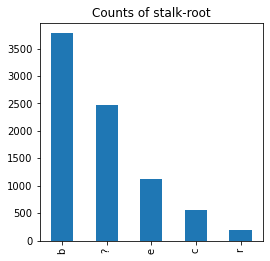

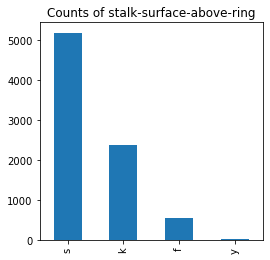

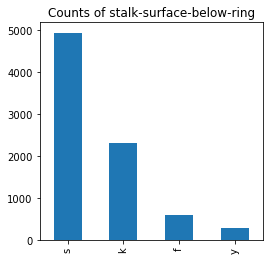

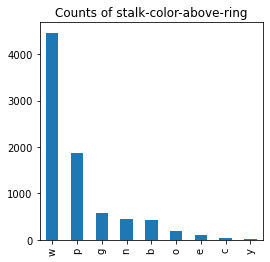

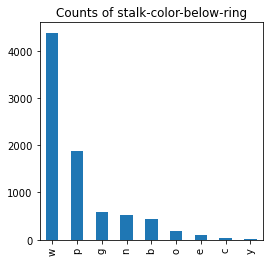

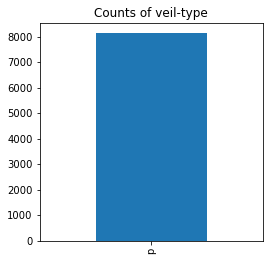

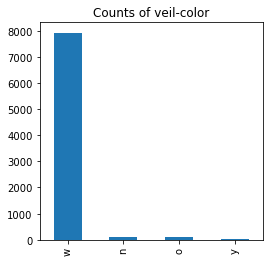

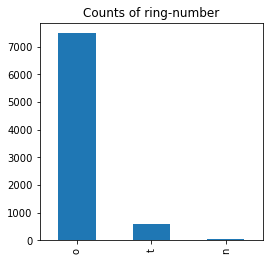

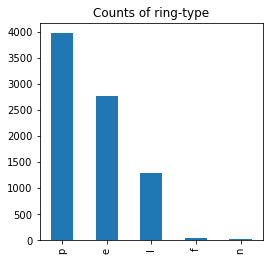

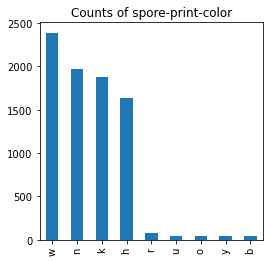

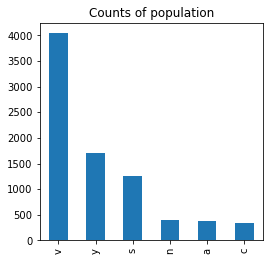

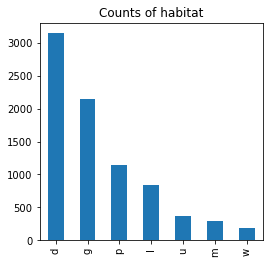

In [8]:
plot_df = []
for i in mush_df.columns:
    plot_df = pd.DataFrame(mush_df[i].value_counts())
    plot_df.plot(kind = 'bar', figsize =(4,4), title = "Counts of %s" %i, legend = False)
    plot_df = []

From the following distributions, no other singular attribute seems to have a similar distribution to the class attribute, and therefore more complex classification rules will need to be implemented.

These plots however did reveal that the attribute of "veil-type" only has one unique value and would not serve much use in classification of edible vs posionous mushrooms. Therefore, it will be dropped from the dataset. 

In [9]:
mush_df = mush_df.drop('veil-type', axis = 1)
if 'veil-type' not in mush_df.columns:
    print("Veil-type has been successfully removed")
else:
    print("Veil-type is still in dataframe")

Veil-type has been successfully removed


Now let us start to implement different algorithms to implement a decision tree. We want to utilize the sklearn.tree library with a built in DecisionTreeClassifier. To prepare the data for that function, it must be encoded from nominal data to numerical data. 


In [10]:
#Change data type to category
print("initial column types \n", mush_df.dtypes, "\n")
mush_df = mush_df.astype('category')
print("post column types \n",mush_df.dtypes)

initial column types 
 class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object 

post column types 
 class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

#encode nominal data as numeric to be used in built-in decisiontreeclassifier
encode_test = mush_df.copy(deep = True)

le = LabelEncoder()
for column in encode_test.columns:
    encode_test["%s code" %column] = le.fit_transform(encode_test[column])
#encode_test.head()

#remove alpha categorical columns
mush_encode = encode_test.drop(axis = 1, columns = mush_df.columns)
#confirm columns were dropped
mush_encode.head()
#encode_test[['class','class code']]

,class code,cap-shape code,cap-surface code,cap-color code,bruises code,odor code,gill-attachment code,gill-spacing code,gill-size code,gill-color code,...,stalk-surface-above-ring code,stalk-surface-below-ring code,stalk-color-above-ring code,stalk-color-below-ring code,veil-color code,ring-number code,ring-type code,spore-print-color code,population code,habitat code
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Let's visualize if this encoding can help reveal any additional patterns..

<function matplotlib.pyplot.show(close=None, block=None)>

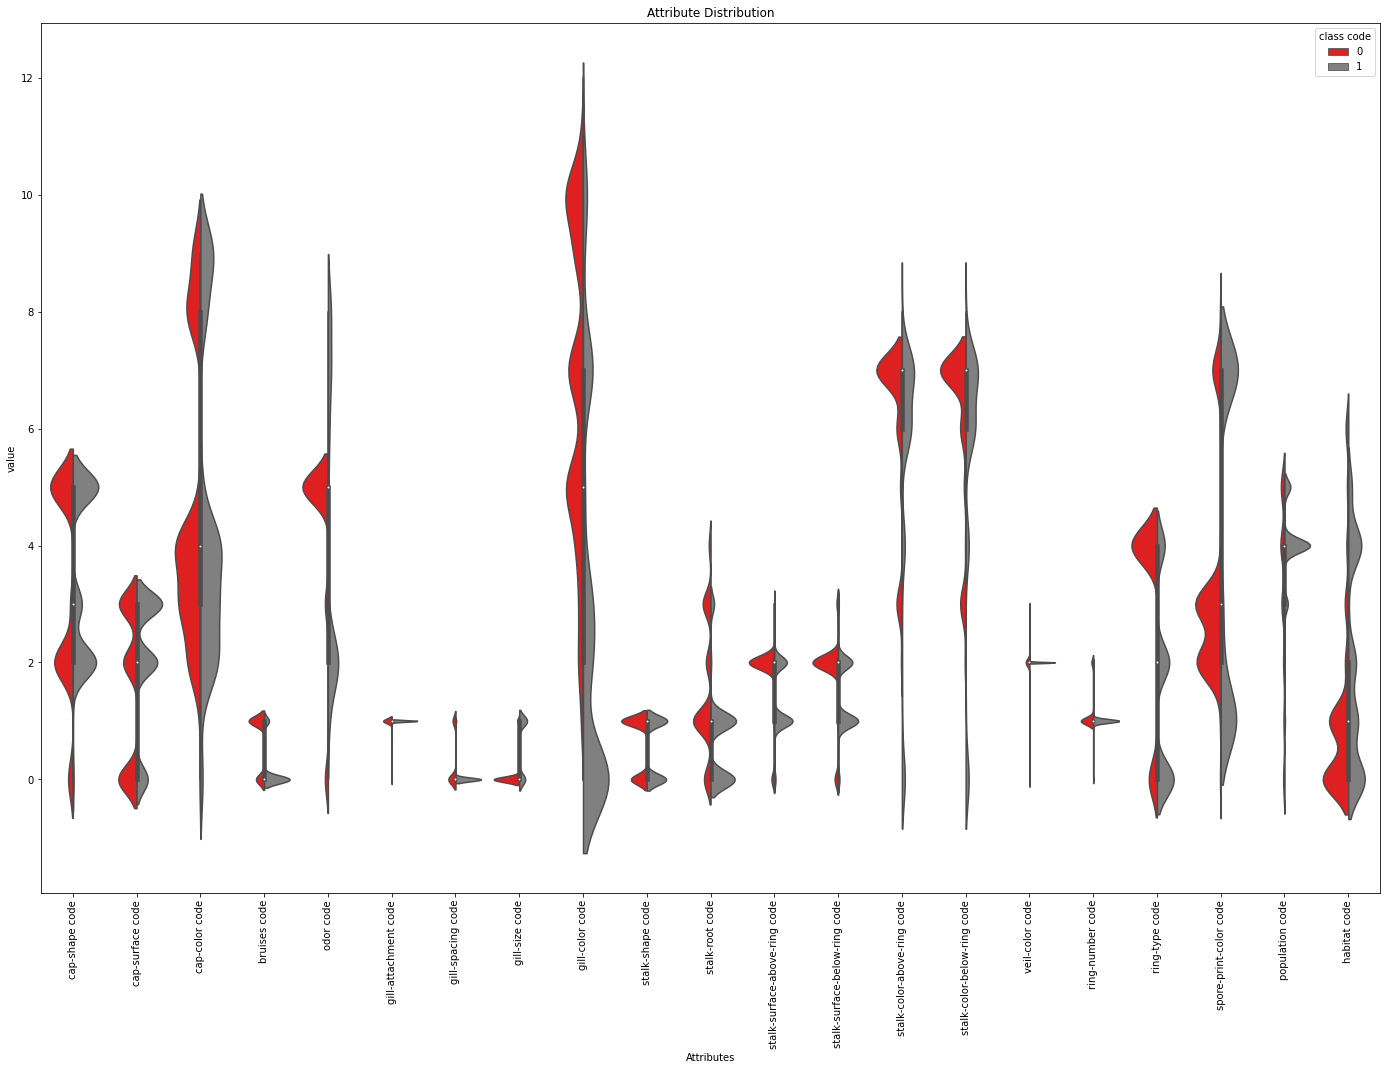

In [12]:
#transform dataframe with "class" as identifier
#class code:
    #0 = edible
    #1 = poisonous
class_col = {0: "r", 1: "#808080"}
mush_df_trans = pd.melt(mush_encode, "class code", var_name = "Attributes")

fig, ax = plt.subplots(figsize = (24,16))
mush_violin = sns.violinplot(ax = ax, x = "Attributes", y = "value",
     hue = "class code", split = True, data = mush_df_trans, palette=class_col).set(title='Attribute Distribution')

plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 50})
plt.show
#plt.savefig("attDistviolin.png", format='png', dpi=500, bbox_inches='tight')

Here we can see some distinct separation between classes in attribute "gill-color" above or below a value of 3. We can also see some distinct clustering for each class in the attribute "odor" around 1-3 vs 4-6. This could possibly be indicators of stronger contributors to classification.

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

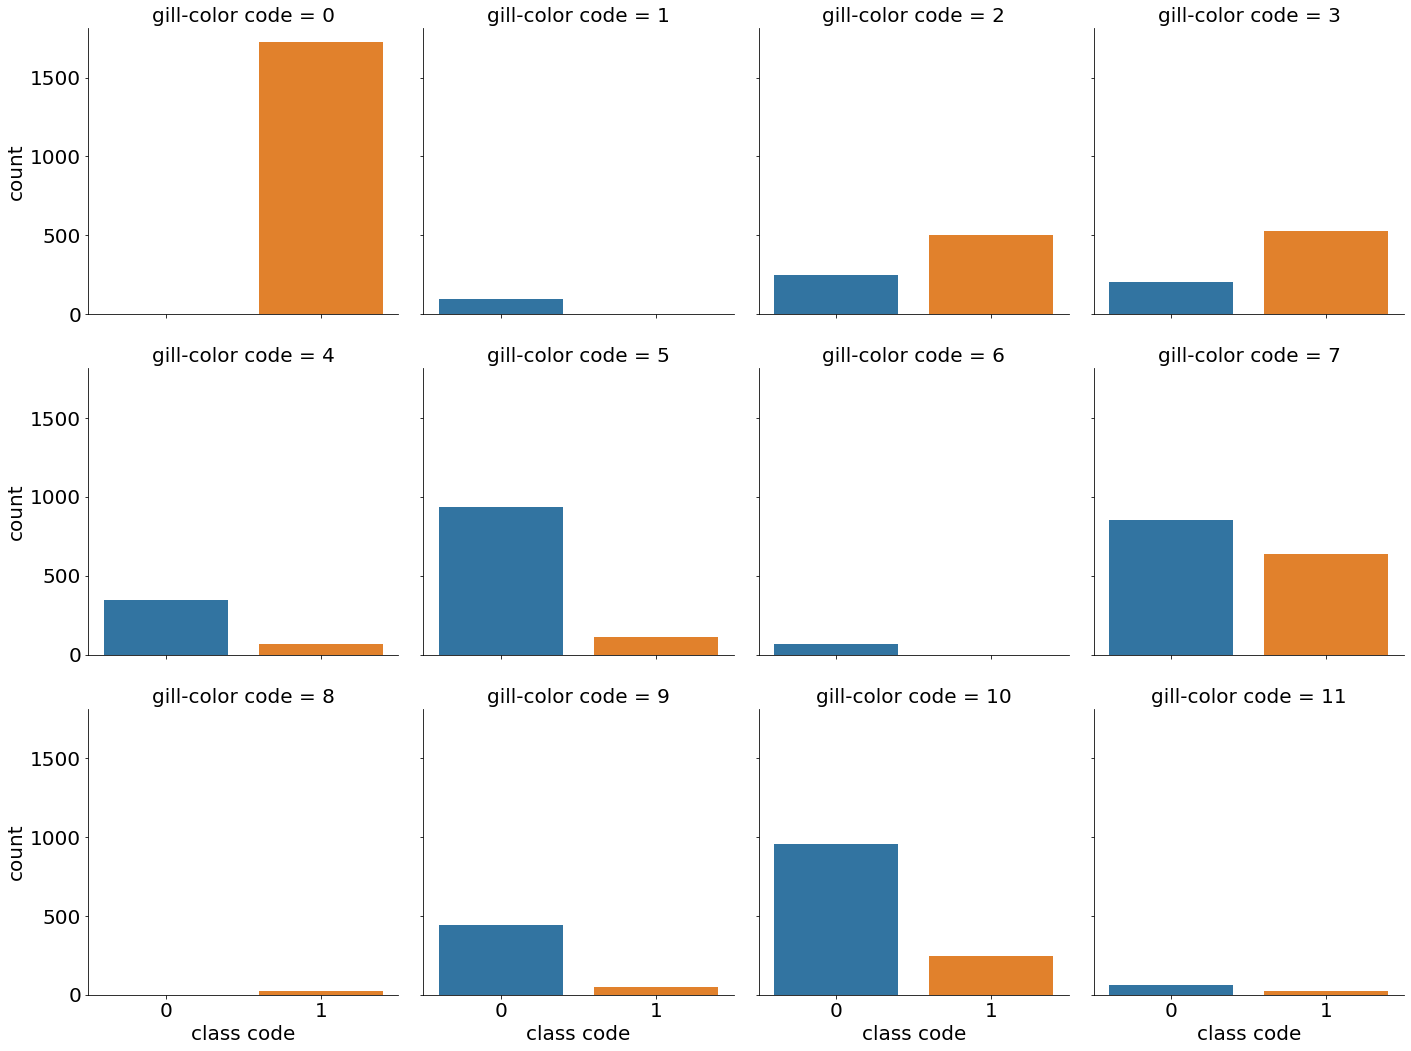

In [13]:
gillcolor_df = mush_encode[['class code','gill-color code']]

plt.rcParams.update({'font.size': 20})
sns.factorplot('class code', col = 'gill-color code', data = gillcolor_df,kind = 'count',col_wrap=4)
plt.show

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

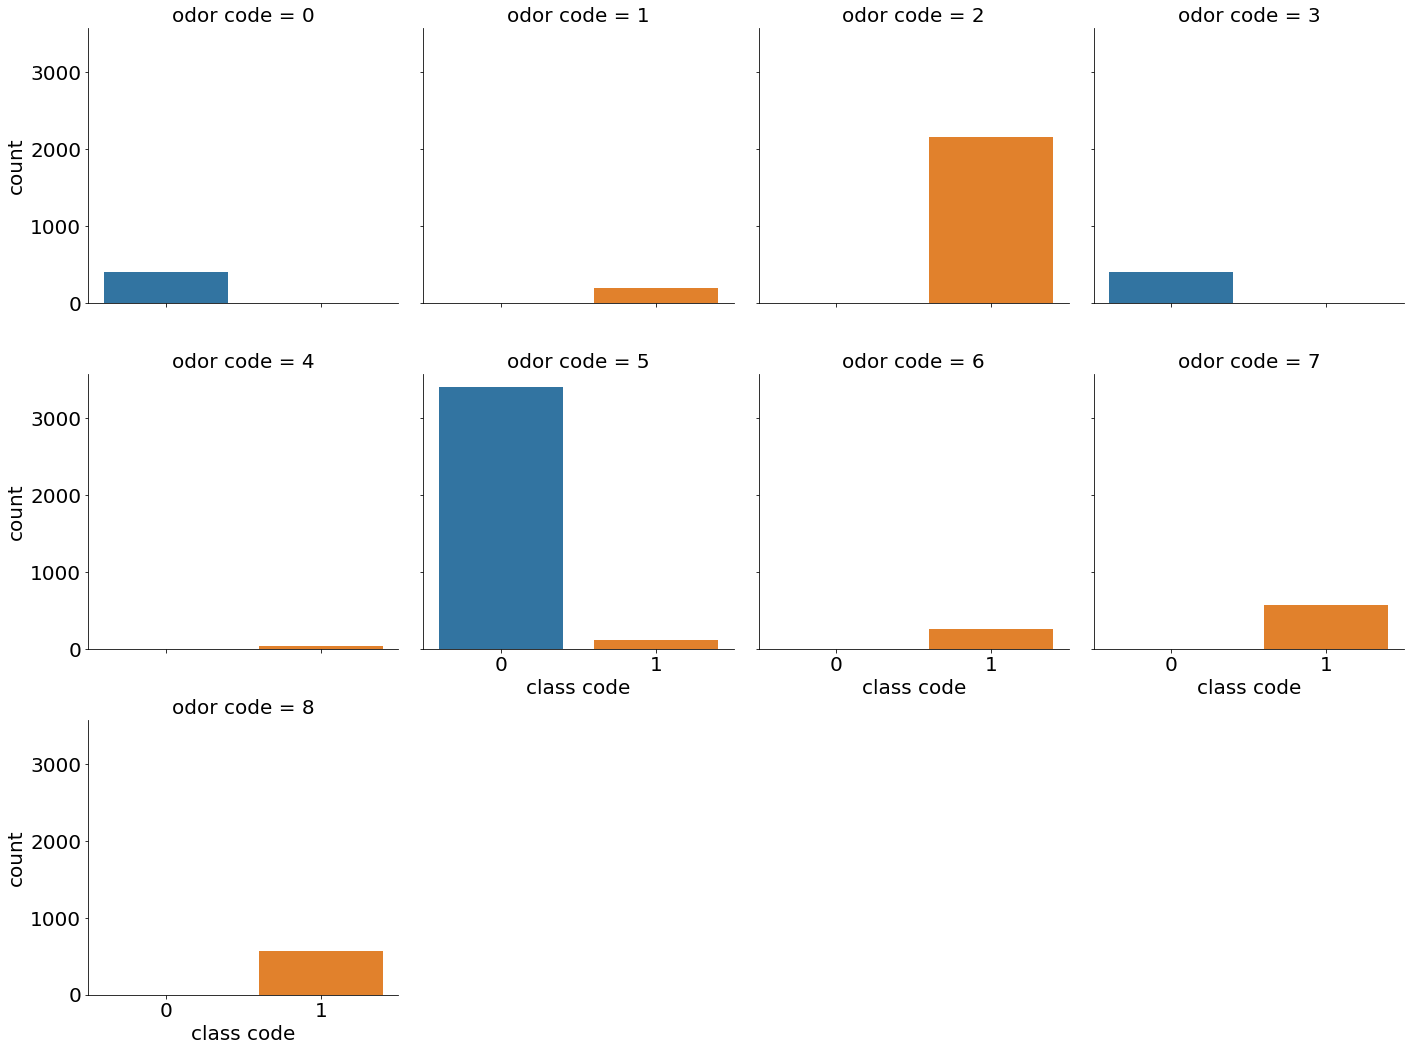

In [14]:
odor_df = mush_encode[['class code','odor code']]

plt.rcParams.update({'font.size': 20})
sns.factorplot('class code', col = 'odor code', data = odor_df,kind = 'count',col_wrap=4)
plt.show

We will now split the dataset into "training" and "testing" datasets to avoid overfitting a model that performs well on our given dataset but fails to generalize on new, unseen data points.

In [15]:
#split dataset into training and test
mush_train, mush_test = train_test_split(mush_encode, test_size = 0.2, random_state = 123)

print(f"No. of training examples: {mush_train.shape[0]}")
print(f"No. of testing examples: {mush_test.shape[0]}")

No. of training examples: 6499
No. of testing examples: 1625


Now we can implement the DecisionTreeClassifier. In this first iteration we limited to the criteria to "entropy". In the next cell we use the default "gini" for Gini impurity to observe differences in decision tree quality.

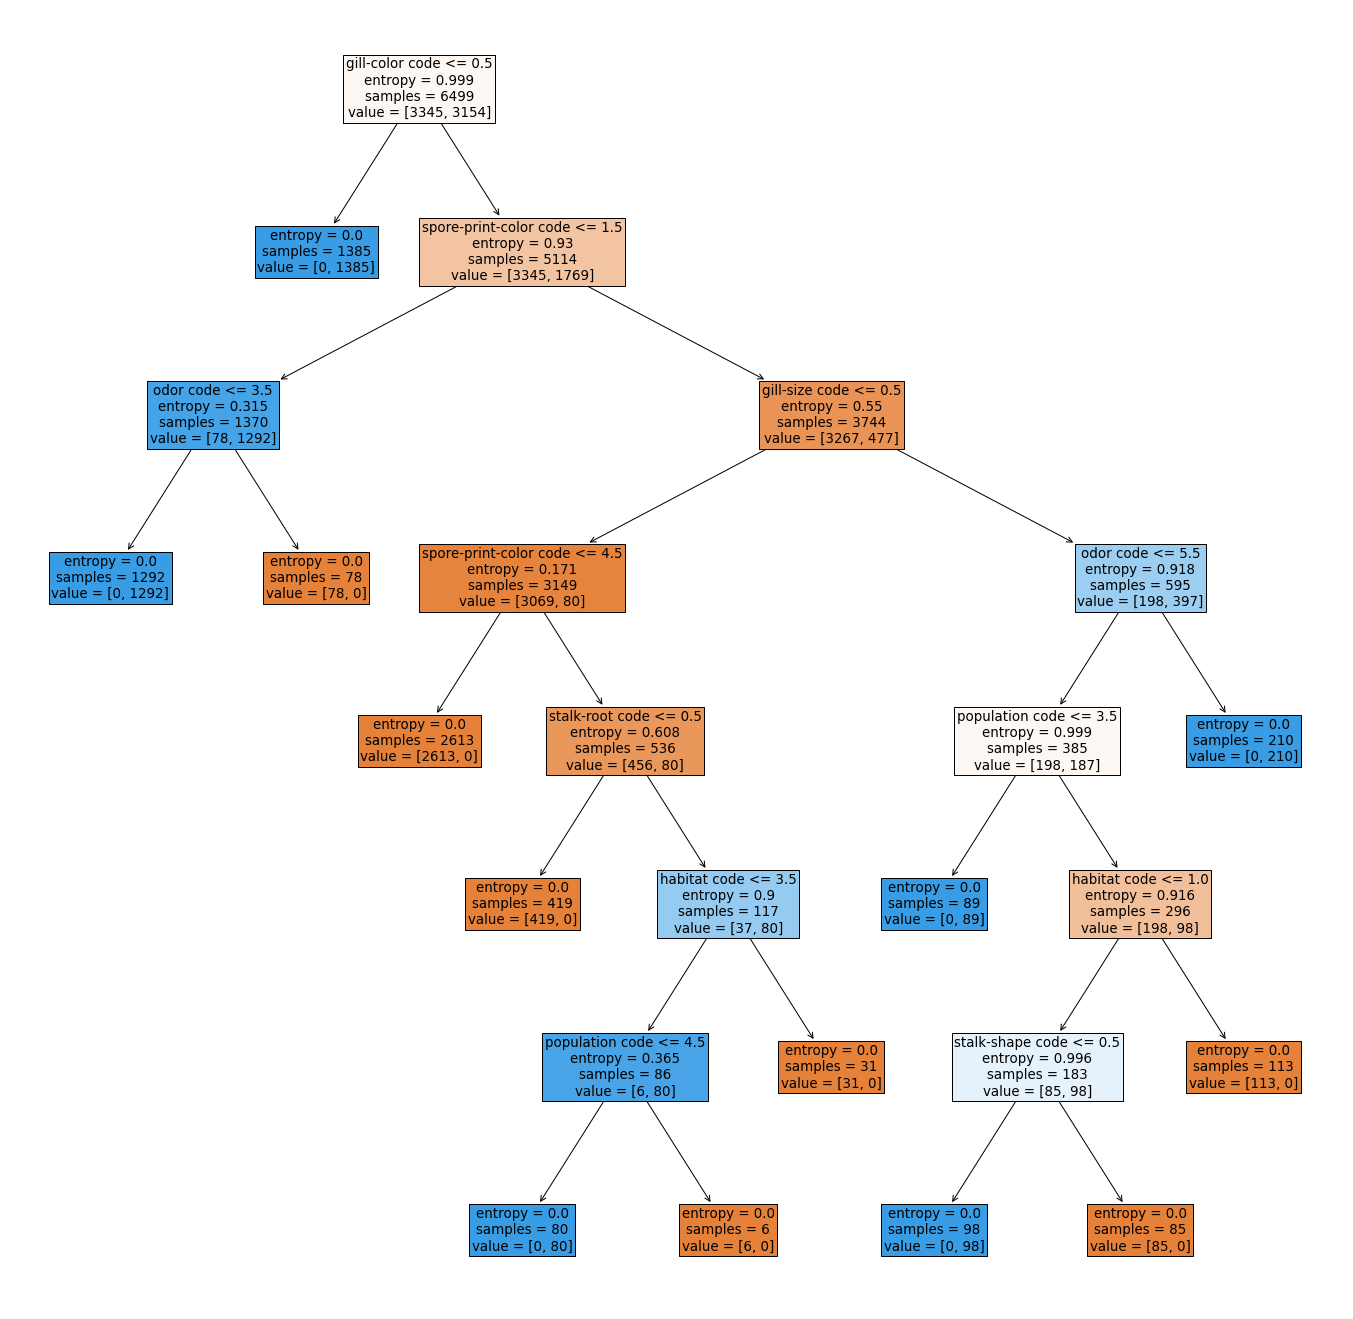

In [16]:
X_train = mush_train.loc[:, mush_train.columns!= 'class code']
Y_train = mush_train['class code']

#implement decisionTree
#built in calssifier needs numeric data (encode cateogrical data)
#utilizes optimized CART algorithm
mush_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
mush_tree.fit(X_train,Y_train)

#show decision tree
fig, ax = plt.subplots(figsize=(24, 24))
tree.plot_tree(mush_tree,ax=ax,feature_names=X_train.columns, filled = True)
plt.show()

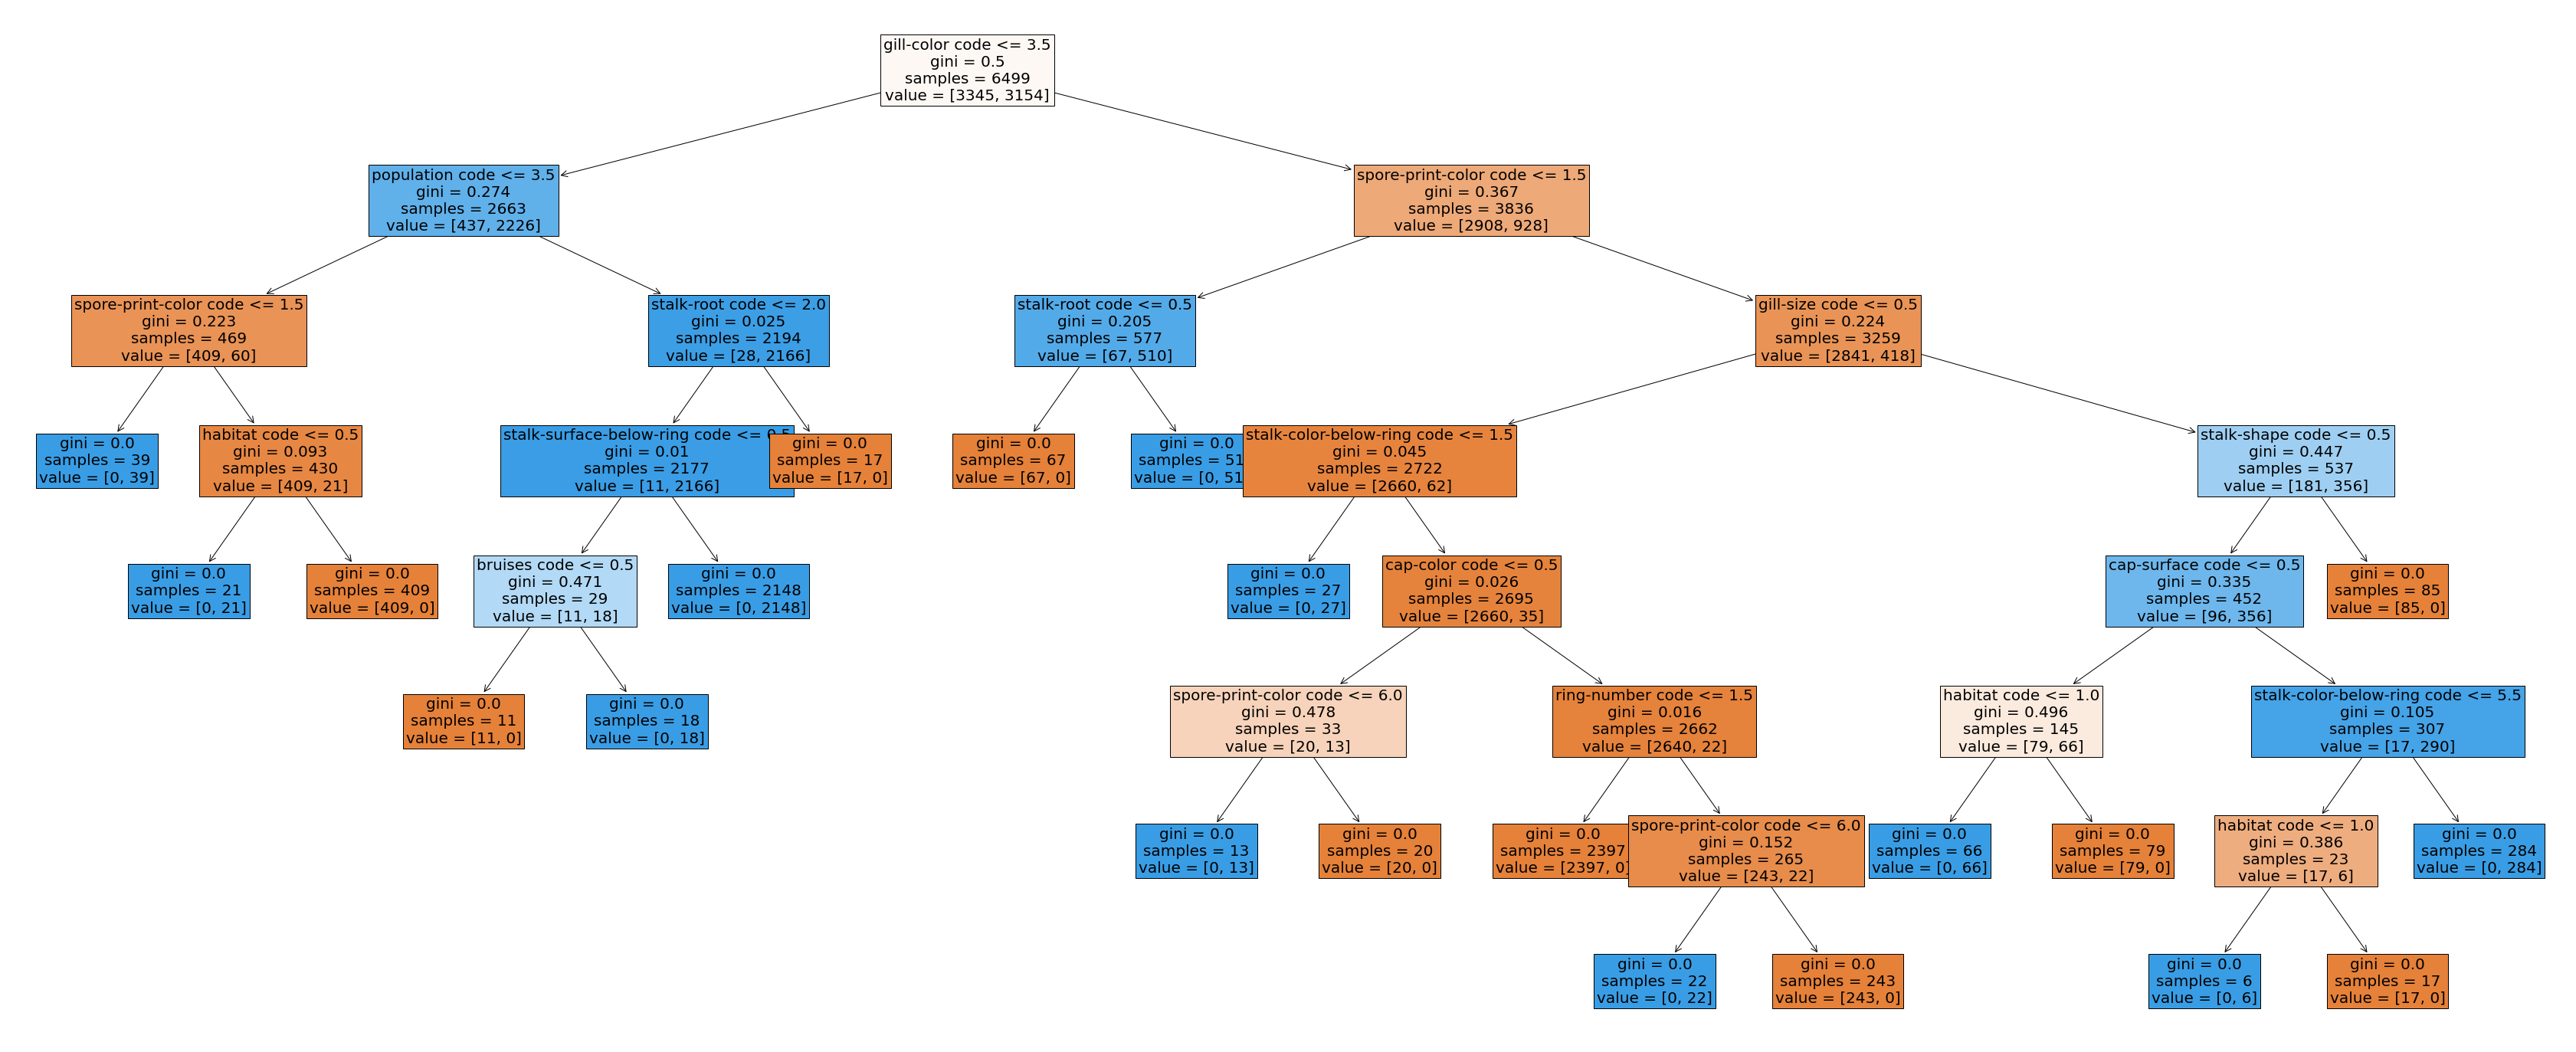

In [18]:
#tree created with criterion = "gini"
mush_tree1 = tree.DecisionTreeClassifier()
mush_tree1.fit(X_train,Y_train)

fig, ax = plt.subplots(figsize=(60, 25))
tree.plot_tree(mush_tree1,ax=ax,feature_names=X_train.columns, filled = True, fontsize = 20)
#plt.rcParams.update({'font.size': 50})
#plt.title("Mushroom Classification Decision Tree using Gini Impurity")
plt.show()

According to calculations by use of Gini index, the most important variable in the classification of mushrooms as edible or poisonous is the mushroom's gill-color as it as designated as the root node in both criterion of the DecisionTreeClassifier. Most notably there is a distinction at the value of 3.5, as encoded by the ...

Let's look at alternate method of implementing a decision tree by combining many decision trees models and introduce some randomness through a Random Forest model.

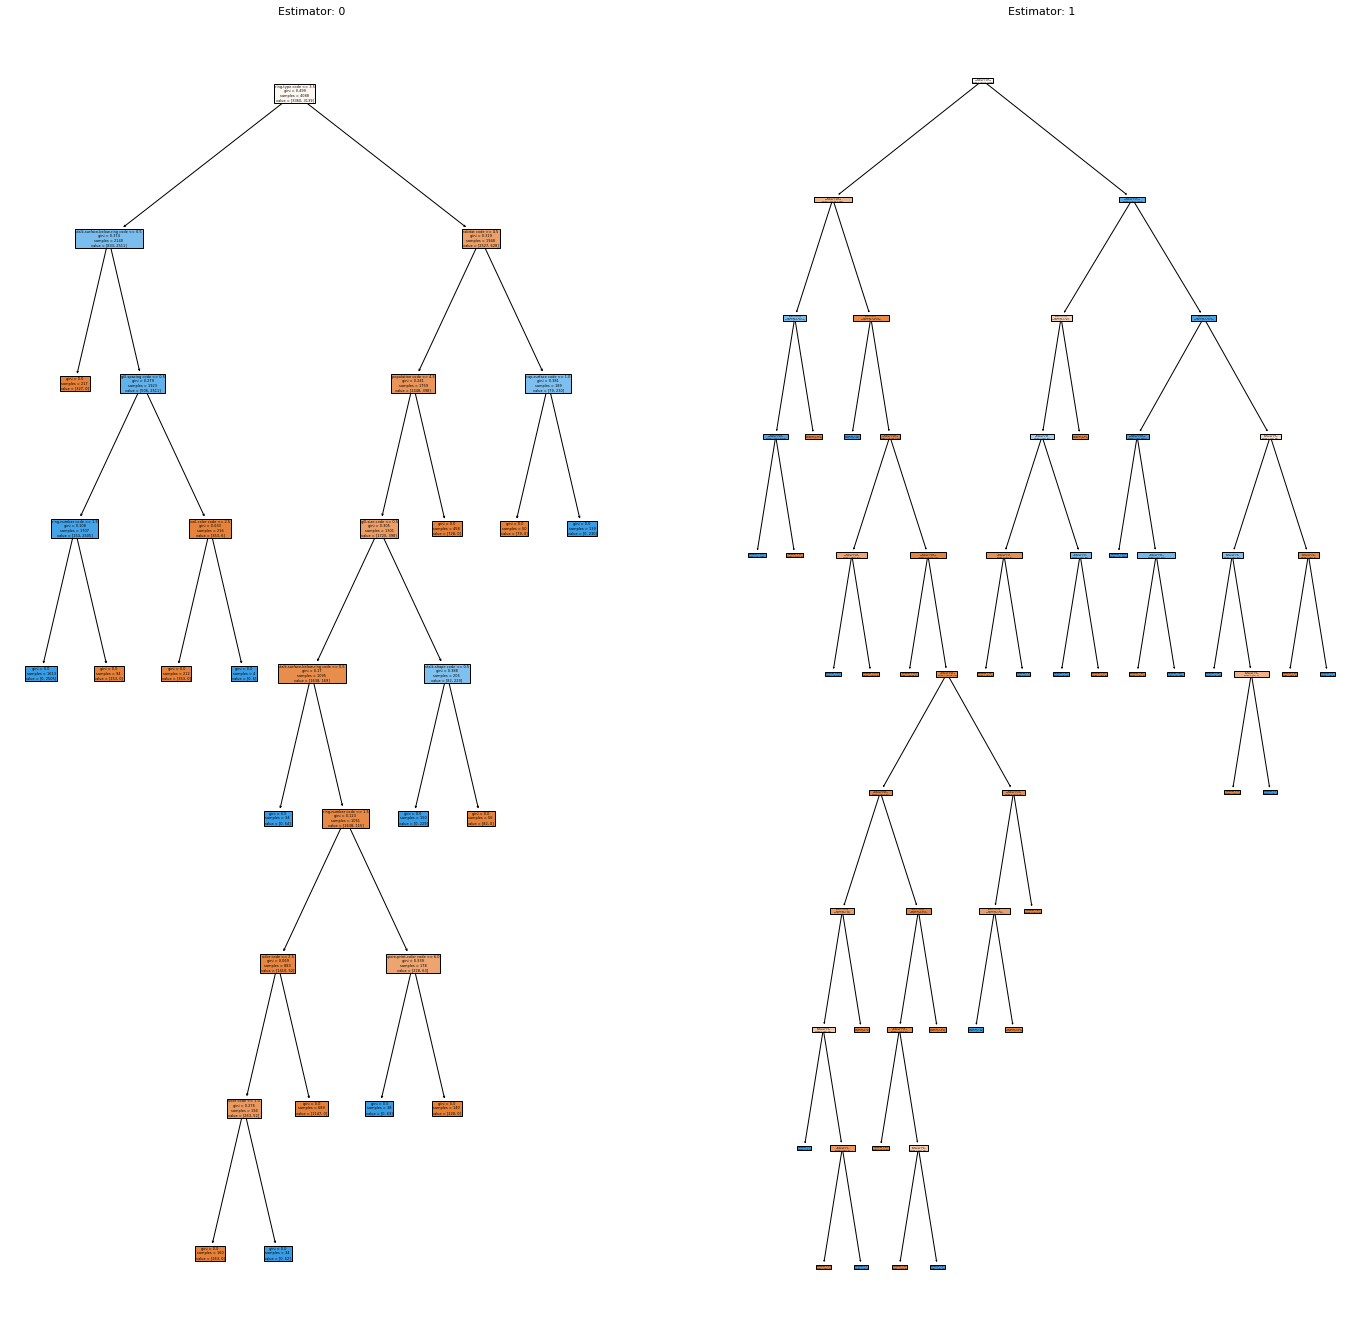

In [19]:
from sklearn.ensemble import RandomForestClassifier

mush_forest = RandomForestClassifier(random_state=0)
mush_forest.fit(X_train,Y_train)

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize=(24, 24))
for index in range(0, 2):
    tree.plot_tree(mush_forest.estimators_[index],
                   feature_names = X_train.columns, 
                   filled = True,
                   ax = ax[index])

    ax[index].set_title('Estimator: ' + str(index), fontsize = 11)
plt.show()
#fig.savefig('mush_forest.png')

In [20]:
#determine how many decision trees were created
len(mush_forest.estimators_)

100

In [21]:
#list out importance of attributes for classification of mushroom of DecisionTreeClassifier
attribute_import_tab = pd.DataFrame({"Importance value": mush_tree1.feature_importances_}, index = X_train.columns.values)
attribute_import_tab.sort_values("Importance value", axis = 0, ascending = False)


,Importance value
gill-color code,0.341615
spore-print-color code,0.209625
population code,0.175761
gill-size code,0.113227
stalk-root code,0.046767
habitat code,0.037187
stalk-shape code,0.027340
stalk-color-below-ring code,0.023203
cap-surface code,0.014534
bruises code,0.004206


<function matplotlib.pyplot.show(close=None, block=None)>

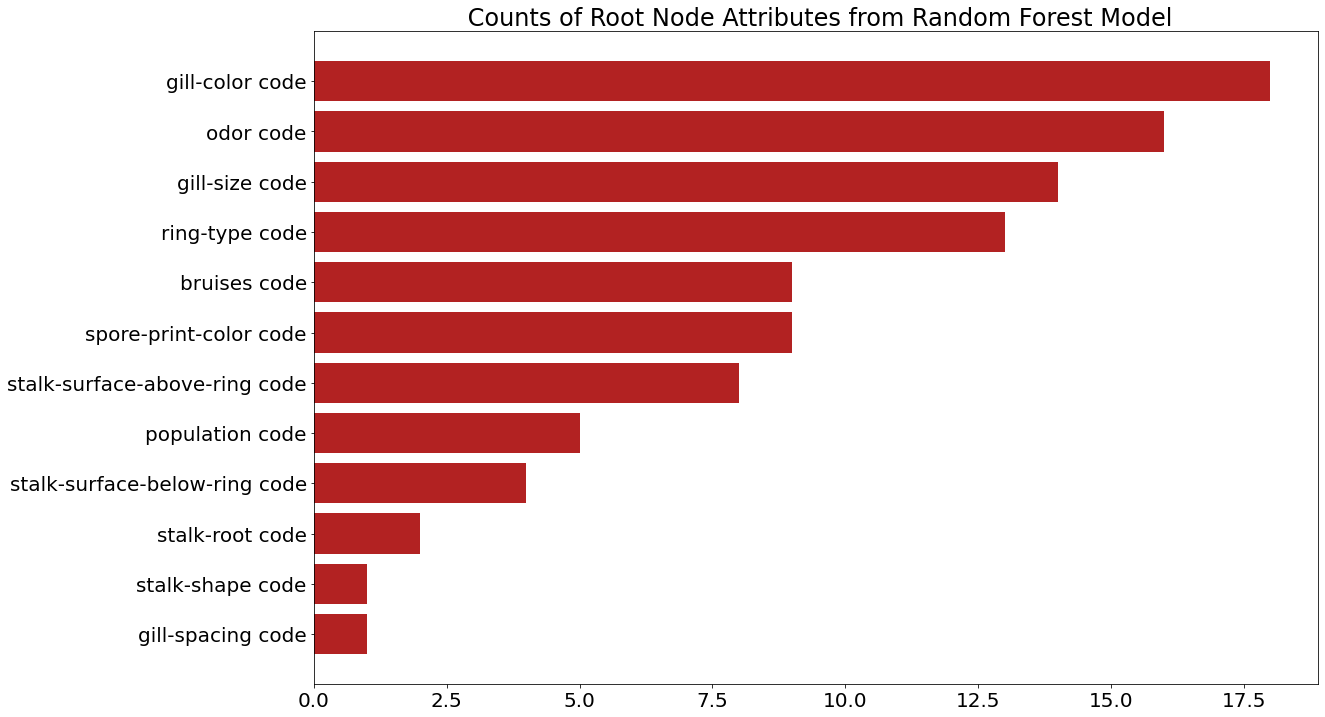

In [22]:
#determine frequency of most important attribute in random forest classifier
forest_att_imp = pd.DataFrame()
for index in range(len(mush_forest.estimators_)):
    temp = pd.DataFrame({"Importance value": mush_forest.estimators_[index].feature_importances_}, index = X_train.columns.values)
    forest_att_imp = forest_att_imp.append(temp.loc[temp["Importance value"].idxmax()])
    temp = pd.DataFrame()


forest_att_imp = pd.DataFrame({"Importance Value Counts":forest_att_imp.index.value_counts()}, index = forest_att_imp.index.unique())
forest_att_imp = forest_att_imp.sort_values("Importance Value Counts", axis = 0, ascending = True)

plt.figure(figsize = (18,12))
plt.rcParams.update({'font.size': 20})
plt.barh(y = forest_att_imp.index, width = forest_att_imp["Importance Value Counts"], color = "firebrick")
plt.title(" Counts of Root Node Attributes from Random Forest Model")
plt.show

From analysis of Random Forest decision trees, we can be confident in the assignment of "gill-color" as the most important categorizing attribute followed by "odor". Both conclusions support initial patterns observed in breakdown of class counts per attribute.

This supports the usage of DecisionTreeClassifier with criterion of "Gini." The next step would be to evaluate both the RandomForest model and the DecisionTreeClassifier model on the test data for accuracy.

In [23]:
from sklearn.metrics import classification_report

#predict using single Decision Tree (gini)
X_test = mush_test.loc[:, mush_test.columns!= 'class code']
Y_test = mush_test['class code']

Y_pred = mush_tree1.predict(X_test)

print("Decision Tree Classification Report: \n\n",classification_report(Y_test, Y_pred))
print("Model Accuracy:", (mush_tree1.score(X_test, Y_test))*100, "%")

Decision Tree Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Model Accuracy: 100.0 %


In [24]:
#Predict using single decision tree(entropy)
Y_pred_en = mush_tree.predict(X_test)

print("Decision Tree Classification Report: \n\n",classification_report(Y_test, Y_pred_en))
print("Model Accuracy:", (mush_tree.score(X_test, Y_test))*100, "%")

Decision Tree Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Model Accuracy: 100.0 %


In [25]:
#predict using random forest
Y_pred2 = mush_forest.predict(X_test)

print("Random Forest Classification Report: \n\n", classification_report(Y_test, Y_pred2))

print("Model Accuracy:", (mush_forest.score(X_test, Y_test))*100, "%")

Random Forest Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Model Accuracy: 100.0 %


All decision tree models and random forrest models had accuracy ratings of 100%!

In [26]:
#implement naive bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)

Y_pred3 = nb.predict(X_test)
print("Gaussian Naive Bayes Report: \n\n", classification_report(Y_test, Y_pred3))

print("Model Accuracy:", round((nb.score(X_test, Y_test))*100,2), "%")

Gaussian Naive Bayes Report: 

               precision    recall  f1-score   support

           0       0.91      0.91      0.91       863
           1       0.90      0.90      0.90       762

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

Model Accuracy: 90.65 %


The Naive Bayes model is the only model so far to have $\le 100 \%$ accuracy so let's take a look at a confusion matrix to see the breakdown of erroneous assignments.

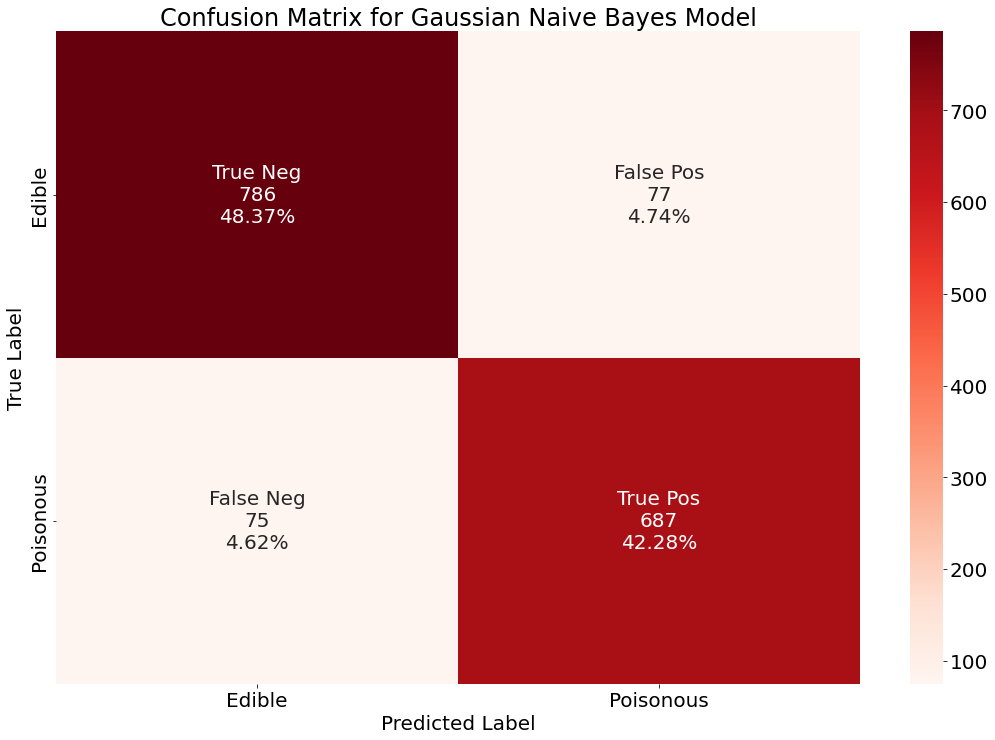

In [27]:
import sklearn.metrics as skm
axis_labels = ["Edible", "Poisonous"]
conf_nb = skm.confusion_matrix(Y_test, Y_pred3)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_nb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_nb.flatten()/np.sum(conf_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (18,12))
sns.heatmap(conf_nb, annot=labels, cmap = "Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt = "")
plt.rcParams.update({'font.size': 20})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gaussian Naive Bayes Model")
plt.show()

From this confusion matrix we can see that the false positive and false negative rate are relatively similar, 4.74% and 4.62% respectively. However, the severe health implications of a false negative vs a false postive need to be considered for practical significance